In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Implementing Synthetic Event Generator

In [3]:
import json
import random
from faker import Faker

# Load Olist datasets
olist_products_df = pd.read_csv(r"C:\Users\yuges\Downloads\E - commerce pipeline cleaned data\olist_products_cleaned_dataset.csv")
olist_orders_df = pd.read_csv(r"C:\Users\yuges\Downloads\E - commerce pipeline cleaned data\olist_orders_cleaned_dataset.csv")
olist_order_items_df = pd.read_csv(r"C:\Users\yuges\Downloads\E - commerce pipeline cleaned data\olist_order_items_cleaned_dataset.csv")
olist_customers_df = pd.read_csv(r"C:\Users\yuges\Downloads\E - commerce pipeline cleaned data\olist_customers_cleaned_dataset.csv")

# Extract lists of real data
product_ids = olist_products_df["product_id"].tolist()
order_ids = olist_orders_df["order_id"].tolist()
customer_ids = olist_customers_df["customer_id"].tolist()
seller_ids = olist_order_items_df["seller_id"].tolist()

fake = Faker()
Faker.seed(42)

# Define event types
event_types = ["purchase"]
payment_types = ["credit_card", "debit_card", "voucher", "boleto"]
payment_weights = [0.6, 0.2, 0.1, 0.1]  # Adjusted distribution

def generate_event():
    event_type = random.choice(event_types)

    # Select a real product, order, customer, and seller
    product_id = random.choice(product_ids)
    order_id = random.choice(order_ids) if event_type in ["add_to_cart", "remove_from_cart", "purchase"] else None
    customer_id = random.choice(customer_ids)
    seller_id = random.choice(seller_ids)

    event = {
        "event_id": fake.uuid4(),
        "timestamp": fake.iso8601(),
        "customer_id": customer_id, 
        "session_id": fake.uuid4(),
        "order_id": order_id,
        "product_id": product_id,
        "seller_id": seller_id,
        "product_category": fake.word(),
        "product_price": round(random.uniform(10, 1000), 2),
        "quantity": (
            random.randint(1, 5) if event_type in ["add_to_cart", "remove_from_cart", "purchase"]
            else (1 if event_type == "product_view" else 0)
        ),
        "payment_type": (
            random.choices(payment_types, weights=payment_weights, k=1)[0]
            if event_type == "purchase"
            else None
        ),
        "customer_state": fake.state_abbr() if event_type == "purchase" else "Unknown",
        "customer_city": fake.city() if event_type == "purchase" else "Unknown"
    }
    return event

if __name__ == "__main__":
    num_events = 30000  
    events = [generate_event() for _ in range(num_events)]
    
    with open("synthetic_ecommerce_events.json", "w") as f:
        json.dump(events, f, indent=4)

    print("Synthetic e-commerce events with real product, order, customer, and seller IDs generated successfully!")


Synthetic e-commerce events with real product, order, customer, and seller IDs generated successfully!


In [3]:
data = pd.read_json("synthetic_ecommerce_events.json")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   event_id          30000 non-null  object        
 1   timestamp         30000 non-null  datetime64[ns]
 2   customer_id       30000 non-null  object        
 3   session_id        30000 non-null  object        
 4   order_id          30000 non-null  object        
 5   product_id        30000 non-null  object        
 6   seller_id         30000 non-null  object        
 7   product_category  30000 non-null  object        
 8   product_price     30000 non-null  float64       
 9   quantity          30000 non-null  int64         
 10  payment_type      30000 non-null  object        
 11  customer_state    30000 non-null  object        
 12  customer_city     30000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 3.0+ MB

### Handling Missing values in Synthetic Event Generator data

In [5]:
data.isna().sum()

event_id            0
timestamp           0
customer_id         0
session_id          0
order_id            0
product_id          0
seller_id           0
product_category    0
product_price       0
quantity            0
payment_type        0
customer_state      0
customer_city       0
dtype: int64

In [7]:
print(data.duplicated().sum())

0


In [8]:
data["quantity"] = data["quantity"].astype("int8")

In [9]:
data.dtypes

event_id                    object
timestamp           datetime64[ns]
customer_id                 object
session_id                  object
order_id                    object
product_id                  object
seller_id                   object
product_category            object
product_price              float64
quantity                      int8
payment_type                object
customer_state              object
customer_city               object
dtype: object

In [10]:
data.head()

,event_id,timestamp,customer_id,session_id,order_id,product_id,seller_id,product_category,product_price,quantity,payment_type,customer_state,customer_city
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,1988-09-18 21:22:51,6fdc71b6a2bcc3d3ef70f8a53c3d039f,bc8960a9-23b8-41e9-b924-56de3eb13b90,0df040f84e5295f7894177ffe53850b8,27da9ff5303d900602623ce3b731e0bf,1336efc61c316ddf92c899eb817f7cae,blue,946.92,3,voucher,TX,New Roberttown
1,815ef6d1-3b8f-4a18-b7f8-a88b17fc695a,2010-12-20 06:09:38,821655ab2e1dee407394c784caea8de0,b74d0fb1-32e7-4629-8fad-c1a606cb0fb3,d0b7e2eb7a74f928072f23a62f4e4f58,46d35d41fbeb3693160ab97bdfa11cd4,382229d1e840115ffe3dbf5ff460e417,rate,806.94,3,debit_card,UT,Robinsonshire
2,01a9e71f-de8a-474b-8f36-d58b47378190,2021-08-21 06:13:25,9a1f57c8665b8cfe232da92bfc983b82,6c307511-b2b9-437a-a8df-6ec4ce4a2bbd,bee3bdf96f440b4049e95e8eb6f64dc0,11fcf75cb0f15b4e28842db20b062850,e9bc59e7b60fc3063eb2290deda4cced,grow,473.18,1,credit_card,KY,East Susan
3,6142ea7d-17be-4111-9a2a-73ed562b0f79,1976-07-31 21:34:03,9aa55c2ab36b9f183627f984104cfd73,9a8dca03-580d-4b71-98f5-64135be6128e,209af55b87cf1212a97772f6525871b3,3470ec574925a96bb8480140fddb1050,968ee78631915a63fef426d6733d7422,everything,122.71,2,debit_card,AS,Lake Stephenville
4,142c3fe8-60e7-4113-ac1b-8ca1f91e1d4c,2007-07-27 01:03:52,22cf5bb1e50e6c05666842be4b83b583,9e574f7a-a0ee-49ae-9453-dd324b0dbb41,9d859f31704188d939d713b4fe19550d,11185dbab7a8593a8f117c4df8be18dd,c826c40d7b19f62a09e2d7c5e7295ee2,value,653.14,2,boleto,VI,Barbaraland


### Loading and Processing Olist data

In [10]:
import kagglehub

path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\yuges\.cache\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2


In [11]:
import os

List_of_files = os.listdir(r"C:\Users\yuges\.cache\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2")

In [12]:
csv_files = []

for i in List_of_files:
    csv_files.append(pd.read_csv(r"C:\Users\yuges\.cache\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2\{}".format(i)))

In [13]:
List_of_files

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

In [14]:
olist_customers_dataset = csv_files[0]

olist_geolocation_dataset = csv_files[1]

olist_orders_dataset = csv_files[2]

olist_order_items_dataset = csv_files[3]

olist_order_payments_dataset = csv_files[4]

olist_order_reviews_dataset = csv_files[5]

olist_products_dataset = csv_files[6]

olist_sellers_dataset = csv_files[7]

product_category_name_translation = csv_files[8]

### Cleaning the Olist data

### Handling missing values in Olist datasets

In [15]:
olist_customers_dataset.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [16]:
olist_geolocation_dataset.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [17]:
olist_orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
olist_orders_dataset.drop(["order_delivered_carrier_date", "order_delivered_customer_date"], axis = 1, inplace = True)
# Deleting carrier date and customer date columns as it is not useful for analysis because of containing estimated delivery date column

# Not handling null values in order_approved_at column as the order was cancelled before approving.

In [19]:
olist_orders_dataset.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                160
order_estimated_delivery_date      0
dtype: int64

In [20]:
olist_order_items_dataset.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [21]:
olist_order_payments_dataset.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [22]:
olist_order_reviews_dataset.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [23]:
olist_order_reviews_dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [24]:
# Dropping review_comment_title column because of too high null count and review_comment_message as the data is inconsistent.

olist_order_reviews_dataset.drop(["review_comment_title", "review_comment_message"], axis = 1, inplace = True)

In [25]:
olist_order_reviews_dataset.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [26]:
olist_products_dataset.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [27]:
olist_products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [28]:
olist_products_dataset[olist_products_dataset["product_category_name"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [29]:
olist_products_dataset.drop(list(olist_products_dataset[(olist_products_dataset["product_name_lenght"].isna())].index),
                            axis = 0, 
                            inplace = True)

In [30]:
olist_products_dataset[olist_products_dataset["product_weight_g"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN


In [31]:
olist_products_dataset.drop(olist_products_dataset[olist_products_dataset["product_weight_g"].isna()].index.tolist(),
                            axis = 0,
                            inplace = True)

In [32]:
olist_products_dataset.drop(olist_products_dataset[olist_products_dataset["product_category_name"].isin(["pc_gamer", "portateis_cozinha_e_preparadores_de_alimentos"])].index.tolist(),
                            axis = 0,
                            inplace = True)

In [33]:
names_trans = {}

for i,j in zip(product_category_name_translation["product_category_name"],product_category_name_translation["product_category_name_english"]):
    names_trans[i] = j

In [34]:
names = []

for i in olist_products_dataset["product_category_name"]:
    names.append(names_trans.get(i))
    
olist_products_dataset.insert(2, "product_category", names)

In [35]:
olist_products_dataset.drop("product_category_name", axis = 1, inplace = True)

In [36]:
olist_products_dataset.isna().sum()

product_id                    0
product_category              0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [37]:
# Renaming the columns
olist_products_dataset = olist_products_dataset.rename(columns = {"product_name_lenght":"product_name_length", 
                               "product_description_lenght":"product_description_length",
                              "product_photos_qty":"product_photos_quantity",
                              "product_weight_g":"product_weight_gm"})

In [38]:
olist_products_dataset.isna().sum()

product_id                    0
product_category              0
product_name_length           0
product_description_length    0
product_photos_quantity       0
product_weight_gm             0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [39]:
olist_sellers_dataset.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [40]:
product_category_name_translation.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [42]:
print(olist_customers_dataset.duplicated().sum())

0


In [43]:
print(olist_geolocation_dataset.duplicated().sum())

261831


In [44]:
olist_geolocation_dataset.drop_duplicates(inplace = True)

In [46]:
print(olist_geolocation_dataset.duplicated().sum())

0


In [47]:
olist_order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [48]:
olist_order_items_agg = olist_order_items_dataset.groupby("order_id").agg(total_items=("order_item_id", "count"),total_price=("price", "sum"),
total_freight_value = ("freight_value", "sum")                                                                          
).reset_index()

# Pushing useful information to olist_orders data

# Freight value is the shipping charges

In [49]:
olist_order_payments_agg = olist_order_payments_dataset.groupby("order_id").agg(total_payment_value=("payment_value", "sum"),payment_types_used=("payment_type", lambda x: x.mode().iloc[0]),
max_installments=("payment_installments", "max")
).reset_index()

In [50]:
olist_order_reviews_agg = olist_order_reviews_dataset.groupby("order_id").agg(avg_review_score=("review_score", "mean"),
).reset_index()

In [51]:
'''Pushing this useful aggregrated data to olist_orders dataset because of not having unique column in order_items, order_payments,
order_reviews so extracted useful data from them and pushing it to olist_orders dataset'''

olist_orders_dataset = pd.merge(olist_orders_dataset, olist_order_items_agg, on="order_id", how="left")

olist_orders_dataset = pd.merge(olist_orders_dataset, olist_order_payments_agg, on = "order_id", how = "left")

olist_orders_dataset = pd.merge(olist_orders_dataset, olist_order_reviews_agg, on = "order_id", how = "left")

In [52]:
olist_orders_dataset.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                160
order_estimated_delivery_date      0
total_items                      775
total_price                      775
total_freight_value              775
total_payment_value                1
payment_types_used                 1
max_installments                   1
avg_review_score                 768
dtype: int64

In [53]:
olist_orders_dataset[olist_orders_dataset["total_items"].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,total_items,total_price,total_freight_value,total_payment_value,payment_types_used,max_installments,avg_review_score
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,2017-12-05 00:00:00,NaN,NaN,NaN,84.00,credit_card,5.0,1.0
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,2018-02-16 00:00:00,NaN,NaN,NaN,97.68,credit_card,1.0,3.0
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,2017-09-05 00:00:00,NaN,NaN,NaN,132.46,boleto,1.0,1.0
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,2018-02-06 00:00:00,NaN,NaN,NaN,134.38,boleto,1.0,1.0
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,2018-09-12 00:00:00,NaN,NaN,NaN,0.00,not_defined,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,2018-02-06 00:00:00,NaN,NaN,NaN,210.09,boleto,1.0,1.0
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,2018-10-01 00:00:00,NaN,NaN,NaN,63.89,voucher,1.0,5.0
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,2018-09-27 00:00:00,NaN,NaN,NaN,107.13,voucher,1.0,4.0
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2017-09-15 00:00:00,NaN,NaN,NaN,195.91,credit_card,2.0,1.0


In [54]:
olist_orders_dataset.drop(olist_orders_dataset[olist_orders_dataset["total_items"].isna()].index.tolist(), 
                          axis = 0, inplace = True)

In [55]:
olist_orders_dataset.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 14
order_estimated_delivery_date      0
total_items                        0
total_price                        0
total_freight_value                0
total_payment_value                1
payment_types_used                 1
max_installments                   1
avg_review_score                 749
dtype: int64

In [56]:
olist_orders_dataset[olist_orders_dataset["total_payment_value"].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,total_items,total_price,total_freight_value,total_payment_value,payment_types_used,max_installments,avg_review_score
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-04 00:00:00,3.0,134.97,8.49,NaN,NaN,NaN,1.0


In [57]:
olist_orders_dataset.drop(30710, axis = 0 , inplace = True)

In [58]:
olist_orders_dataset[olist_orders_dataset["avg_review_score"].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,total_items,total_price,total_freight_value,total_payment_value,payment_types_used,max_installments,avg_review_score
16,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-02-06 00:00:00,1.0,1299.00,77.45,1376.45,credit_card,10.0,NaN
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-02-07 00:00:00,1.0,53.99,15.13,69.12,boleto,1.0,NaN
311,4906eeadde5f70b308c20c4a8f20be02,4e7656e34357b93f14b40c6400ca3f6e,delivered,2017-12-08 04:45:26,2017-12-12 03:50:30,2018-01-03 00:00:00,1.0,144.99,17.26,162.25,boleto,1.0,NaN
382,b7a4a9ecb1cd3ef6a3e36a48e200e3be,c3d8fc500d86b1c961ee144395c13a57,delivered,2017-05-19 18:13:54,2017-05-20 11:35:41,2017-06-16 00:00:00,1.0,26.00,15.10,41.10,credit_card,4.0,NaN
390,59b32faedc12322c672e95ec3716d614,5baa82a2c45fa3220cb57d9881db3211,delivered,2018-06-27 11:10:11,2018-06-28 02:15:51,2018-07-26 00:00:00,1.0,69.00,18.58,87.58,boleto,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98697,0c384d67524b5b92aa2fa6c8baa9a983,53421895d40d7df28d68c22ffa043355,delivered,2017-06-05 19:20:11,2017-06-05 19:30:18,2017-06-27 00:00:00,1.0,89.90,12.13,102.03,credit_card,1.0,NaN
98781,906a6b0a96d89ee226e4977e99b80b9e,274a720e69d300bc7696c8570f8978fe,delivered,2017-08-28 15:14:21,2017-08-28 15:25:29,2017-09-18 00:00:00,1.0,79.90,12.06,91.96,credit_card,1.0,NaN
99007,5333db16fe357175d39c82840dd3269d,7e008e5ec21e044fe30c34ec4e9d0747,delivered,2018-03-10 18:18:20,2018-03-13 04:08:22,2018-03-29 00:00:00,2.0,107.78,30.52,138.30,boleto,1.0,NaN
99134,2f2df159f26ddb73d55ee72372200d3e,86a7245fffe6a418ca1658a13ecc4531,delivered,2017-07-17 01:19:50,2017-07-17 01:30:09,2017-08-09 00:00:00,1.0,150.00,16.81,166.81,credit_card,8.0,NaN


In [59]:
Q1 = olist_orders_dataset["avg_review_score"].quantile(0.25)

Q3 = olist_orders_dataset["avg_review_score"].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - (1.5*IQR)

UL = Q3 + (1.5*IQR)

olist_orders_dataset[(olist_orders_dataset["avg_review_score"] < LL) | (olist_orders_dataset["avg_review_score"] > UL)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,total_items,total_price,total_freight_value,total_payment_value,payment_types_used,max_installments,avg_review_score
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-05-09 00:00:00,1.0,49.90,16.05,65.95,credit_card,1.0,2.0
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-03-06 00:00:00,1.0,19.90,16.05,35.95,boleto,1.0,1.0
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-06-07 00:00:00,2.0,198.00,61.06,259.06,credit_card,1.0,1.0
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-09-28 00:00:00,1.0,109.90,8.96,118.86,boleto,1.0,2.0
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-03-12 00:00:00,1.0,109.90,15.53,125.43,boleto,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99402,41d74f5b8f1fb05bdec674cbba8f720f,960ddf99f2e615bf50ea0cf4e71f526f,delivered,2018-02-04 14:35:02,2018-02-04 14:50:22,2018-03-01 00:00:00,1.0,39.00,11.85,50.85,credit_card,2.0,1.0
99423,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-31 00:00:00,1.0,36.90,11.85,48.75,boleto,1.0,1.0
99425,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-04-09 00:00:00,1.0,109.97,36.86,146.83,credit_card,2.0,1.0
99432,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2018-01-18 00:00:00,1.0,55.90,15.14,71.04,credit_card,1.0,1.0


In [60]:
olist_orders_dataset["avg_review_score"].fillna(olist_orders_dataset["avg_review_score"].median(), inplace = True)

C:\Users\yuges\AppData\Local\Temp\ipykernel_1720\3976282717.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olist_orders_dataset["avg_review_score"].fillna(olist_orders_dataset["avg_review_score"].median(), inplace = True)


In [61]:
olist_orders_dataset.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_estimated_delivery_date     0
total_items                       0
total_price                       0
total_freight_value               0
total_payment_value               0
payment_types_used                0
max_installments                  0
avg_review_score                  0
dtype: int64

In [62]:
olist_orders_dataset = olist_orders_dataset.rename(columns = {"payment_types_used":"payment_type"})

In [64]:
print(olist_orders_dataset.duplicated().sum())

0


In [65]:
print(olist_order_reviews_dataset.duplicated().sum())

0


In [66]:
print(olist_orders_dataset.duplicated().sum())

0


In [67]:
print(olist_products_dataset.duplicated().sum())

0


In [68]:
print(olist_sellers_dataset.duplicated().sum())

0


In [69]:
print(product_category_name_translation.duplicated().sum())

0


In [70]:
olist_customers_dataset.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [71]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [72]:
olist_geolocation_dataset.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [73]:
olist_geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [74]:
olist_order_items_dataset.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [75]:
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [76]:
olist_order_items_dataset["shipping_limit_date"] = pd.to_datetime(olist_order_items_dataset["shipping_limit_date"])

In [77]:
olist_order_payments_dataset.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [78]:
olist_order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [79]:
olist_order_reviews_dataset.dtypes

review_id                  object
order_id                   object
review_score                int64
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [80]:
olist_order_reviews_dataset.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [81]:
olist_order_reviews_dataset["review_creation_date"] = pd.to_datetime(olist_order_reviews_dataset["review_creation_date"])

olist_order_reviews_dataset["review_answer_timestamp"] = pd.to_datetime(olist_order_reviews_dataset["review_answer_timestamp"])

In [82]:
olist_orders_dataset.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_estimated_delivery_date     object
total_items                      float64
total_price                      float64
total_freight_value              float64
total_payment_value              float64
payment_type                      object
max_installments                 float64
avg_review_score                 float64
dtype: object

In [83]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,total_items,total_price,total_freight_value,total_payment_value,payment_type,max_installments,avg_review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1.0,29.99,8.72,38.71,voucher,1.0,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13 00:00:00,1.0,118.70,22.76,141.46,boleto,1.0,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04 00:00:00,1.0,159.90,19.22,179.12,credit_card,3.0,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-15 00:00:00,1.0,45.00,27.20,72.20,credit_card,1.0,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-26 00:00:00,1.0,19.90,8.72,28.62,credit_card,1.0,5.0


In [84]:
olist_orders_dataset["order_purchase_timestamp"] = pd.to_datetime(olist_orders_dataset["order_purchase_timestamp"])

olist_orders_dataset["order_approved_at"] = pd.to_datetime(olist_orders_dataset["order_approved_at"])

olist_orders_dataset["order_estimated_delivery_date"] = pd.to_datetime(olist_orders_dataset["order_estimated_delivery_date"])

olist_orders_dataset["total_items"] = olist_orders_dataset["total_items"].astype("int8")

olist_orders_dataset["max_installments"] = olist_orders_dataset["max_installments"].astype("int8")

olist_orders_dataset["avg_review_score"] = olist_orders_dataset["avg_review_score"].astype("int8")

In [85]:
olist_products_dataset.dtypes

product_id                     object
product_category               object
product_name_length           float64
product_description_length    float64
product_photos_quantity       float64
product_weight_gm             float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [86]:
olist_products_dataset.head()

,product_id,product_category,product_name_length,product_description_length,product_photos_quantity,product_weight_gm,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [87]:
olist_products_dataset["product_name_length"] = olist_products_dataset["product_name_length"].astype("int16")

olist_products_dataset["product_description_length"] = olist_products_dataset["product_description_length"].astype("int16")

olist_products_dataset["product_photos_quantity"] = olist_products_dataset["product_photos_quantity"].astype("int16")

olist_products_dataset["product_weight_gm"] = olist_products_dataset["product_weight_gm"].astype("int16")

olist_products_dataset["product_length_cm"] = olist_products_dataset["product_length_cm"].astype("int16")

olist_products_dataset["product_height_cm"] = olist_products_dataset["product_height_cm"].astype("int16")

olist_products_dataset["product_width_cm"] = olist_products_dataset["product_width_cm"].astype("int16")

In [88]:
olist_sellers_dataset.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [89]:
olist_sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [90]:
product_category_name_translation.dtypes

product_category_name            object
product_category_name_english    object
dtype: object

## Exploratory Data Analysis on Synthetic E-commerce Events Data

### Univariate Analysis on Discrete data

In [94]:
data

,event_id,timestamp,customer_id,session_id,order_id,product_id,seller_id,product_category,product_price,quantity,payment_type,customer_state,customer_city
0,23b8c1e9-3924-46de-beb1-3b9046685257,2020-02-13 02:11:32,c7432c6d237ffd6aa36a007b4237ec38,bdd640fb-0667-4ad1-9c80-317fa3b1799d,b9a6c5f5df52c7226ac85aee7524c27f,f819f0c84a64f02d3a5606ca95edd272,fe1bbc5feda5c8979a8a1b3b2512d5a6,relogios_presentes,499.04,1,boleto,CT,New Roberttown
1,32e70629-8fad-41a6-86cb-0fb39a1de644,2018-09-22 18:20:08,7f399d641e2e2064470145178c9e8778,815ef6d1-3b8f-4a18-b7f8-a88b17fc695a,261e71d2349c713eafa9f3df5972b95d,b9de40e43fccb6ba53b7eadbd5c49077,c12b92bf1c350f3e6bf88d3596219c86,utilidades_domesticas,24.41,4,debit_card,SD,Robinsonshire
2,b2b9437a-28df-4ec4-8e4a-2bbdc241330b,1998-10-05 03:18:32,ba5642b730704dc0f74b7cf715b41ed5,01a9e71f-de8a-474b-8f36-d58b47378190,67b50899f52995848c427e361e10dde3,26afe4ed5890d941fcba14205863eec7,8c0de775f52fe41590b376a3b7c50f68,moveis_decoracao,938.75,5,boleto,MA,Ericmouth
3,9a8dca03-580d-4b71-98f5-64135be6128e,1988-01-01 16:50:27,0f346a2cc84ebb2d52f0759d0acfd030,18c26797-6142-4a7d-97be-31111a2a73ed,32733fc014b67ef70fa6039dd8c6ba82,986870b9985d95ef6205bae1953a61a5,8e29d051f810eb22959ede205b462b9f,moveis_decoracao,614.79,1,debit_card,AS,Lake Stephenville
4,a0ee89ae-d453-4d32-8b0d-bb418d5288f1,2012-02-03 09:24:13,d393b9491df482cf448e60aa9955b7f2,142c3fe8-60e7-4113-ac1b-8ca1f91e1d4c,39a70e9e9b729b11dee34ac12478597f,28ce57ecf4afba85e6020ec0209cada9,3b18f9856c6eb2413eafedb58e9eecd9,cool_stuff,737.18,1,debit_card,FM,Barbaraland
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,8de481c5-e8d4-423c-a6d7-b38f9d3fb2bf,2011-03-15 15:05:28,9f629b86cfcb063c2d2d714c7dc9f376,826aad17-0a88-4932-b255-b709502b5dc0,ce06291974b77bb06f1e6150423d34f2,b5b528db19a9a5c011aa6f444f510327,e5cbe890e679490127e9a390b46bbd20,telefonia,357.05,3,credit_card,NM,Bakerfort
3091,496f48e1-af23-40ab-85ca-18b99cffa370,2014-03-28 09:49:32,ad1f289fe0d5f0e66faa507b7dd26476,5fd456a6-dbd3-4e61-85fc-71d6f75820c1,91d3db538cfff9a4f1cd5d5ad9481b05,9674b7f245c1d659972605a979ac3dcf,5962468f885ea01a1b6a97a218797b0a,moveis_escritorio,602.22,3,credit_card,IA,Marymouth
3092,75ae9fb5-bff9-4f1d-b235-418130b4c334,2023-07-28 05:56:38,9eecb0e524388f6bab5f8dab088a930e,d93378c0-5aa9-4609-9662-0519236a1333,768697bea3da93c033aa064d821579e2,2280139813948df83ba872aecca72997,ff4ea69c2a729e83e63c7579e4ef8170,casa_conforto,160.48,2,voucher,KS,Port Kristenfort
3093,43e01c80-0667-4aa2-8809-57a479ae8ee7,1980-03-24 16:02:33,0d25047b8fa2245d9bd6b2901623460e,8ebd14ca-6b7e-4381-b73a-24b663a8bb64,e5cf005255a551709fd938c0c57e3d6a,d2c855e70242f27beeaba55b9cfa7380,8e2b3afb420011ef0c88c9d5f11ea526,esporte_lazer,757.40,4,credit_card,AK,Fisherstad


************************************************** payment_type **************************************************


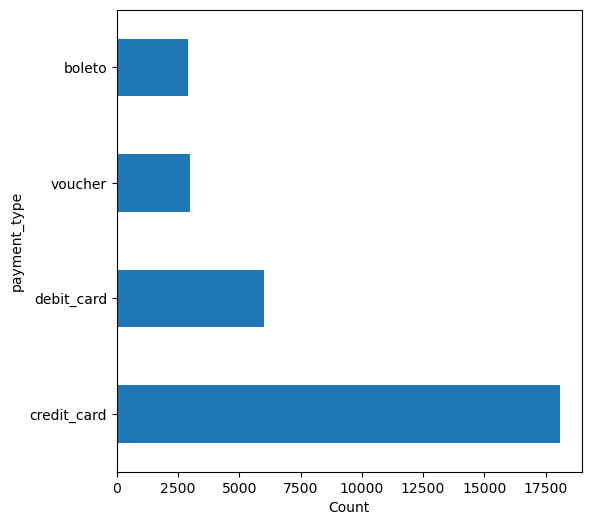


************************************************** quantity **************************************************


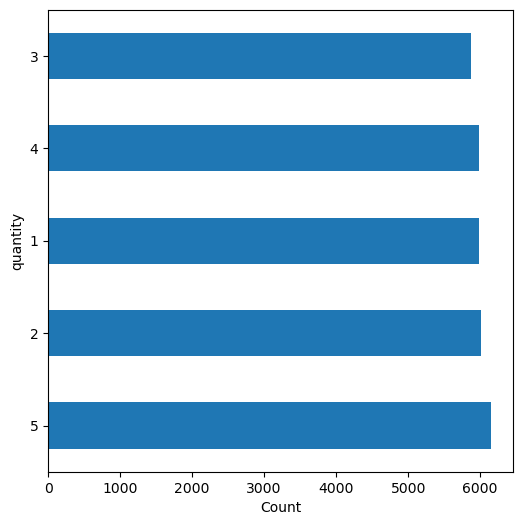

In [206]:
discrete_cols = ["payment_type", "quantity"]

for i in discrete_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    data[i].value_counts().plot.barh()
    plt.xlabel("Count")
    plt.ylabel(i)
    plt.show()
    print()

************************************************** payment_type **************************************************


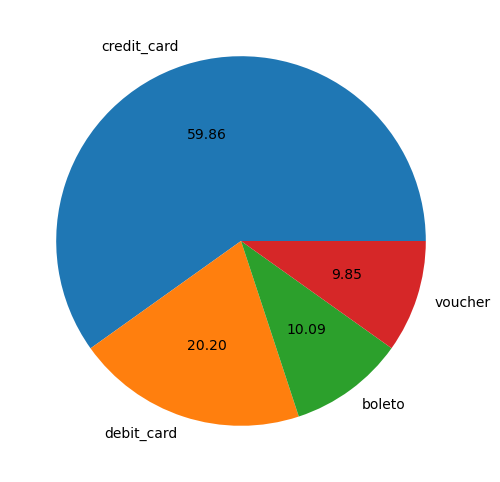


************************************************** quantity **************************************************


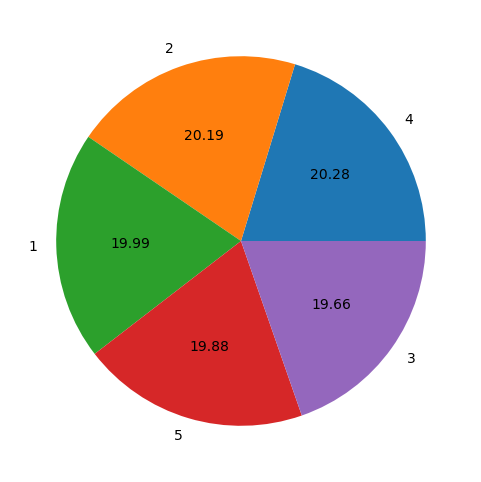

In [88]:
for i in discrete_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    data[i].value_counts().plot.pie(autopct = "%.2f")
    plt.ylabel("")
    plt.show()
    print()

### Univariate Analysis on Continuous data

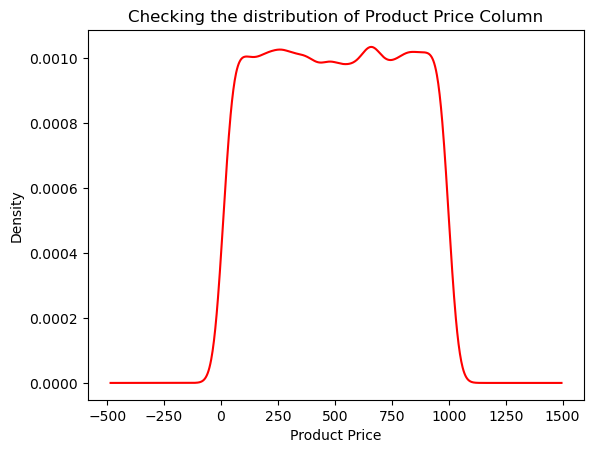

In [71]:
data["product_price"].plot.kde(color = "red")
plt.xlabel("Product Price")
plt.title("Checking the distribution of Product Price Column")
plt.show()

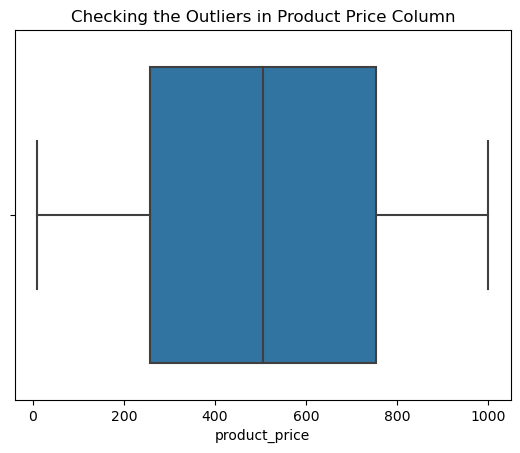

In [72]:
sns.boxplot(data = data, x = "product_price")
plt.title("Checking the Outliers in Product Price Column")
plt.show()

### Bi Variate Analysis

#### For Continuous vs Discrete data

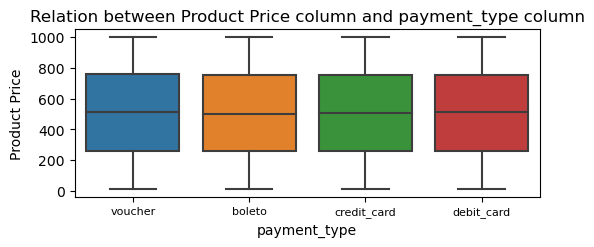

****************************************************************************************************


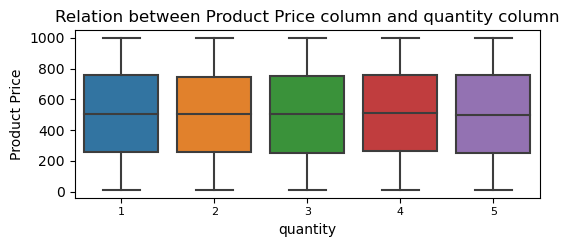

****************************************************************************************************


In [73]:
c = 1
for i in discrete_cols:
    plt.figure(figsize = (6,10))
    plt.subplot(4,1,c)
    sns.boxplot(data = data, x = i, y = "product_price")
    plt.xlabel(i)
    plt.ylabel("Product Price")
    plt.xticks(fontsize = 8)
    plt.title(f"Relation between Product Price column and {i} column")
    plt.show()
    print("*"*100)

#### For Discrete vs Discrete columns

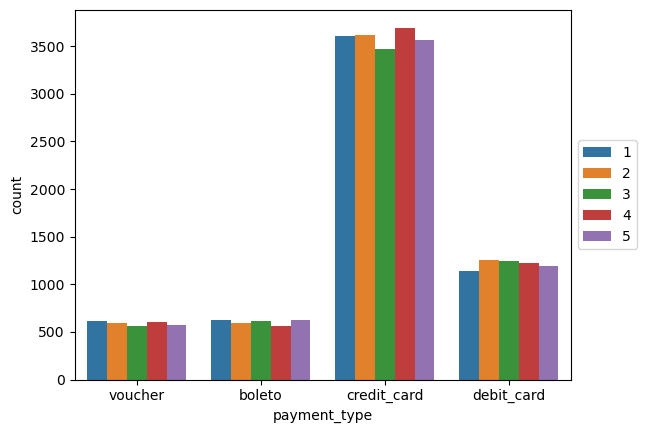

In [89]:
sns.countplot(data = data, x = "payment_type", hue = "quantity")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Exploratory Data Analysis on Olist Data

### Univariate Analysis on Discrete Data in olist_customers_dataset

In [90]:
olist_customers_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


************************************************** customer_state **************************************************


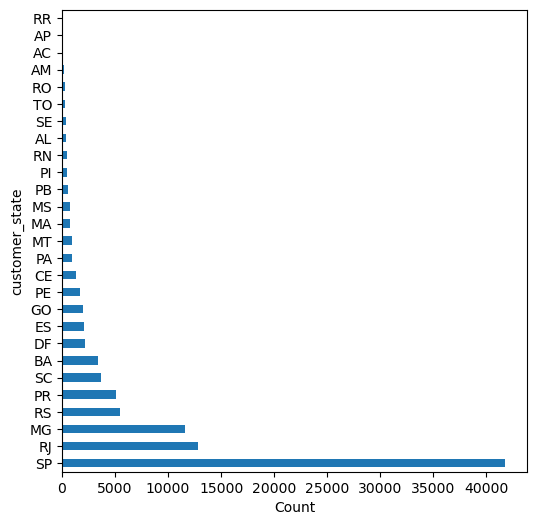

In [91]:
discrete_cols = ["customer_state"]

for i in discrete_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    olist_customers_dataset[i].value_counts().plot.barh()
    plt.xlabel("Count")
    plt.ylabel(i)
    plt.show()
    print()

### Univariate Analysis on Discrete Data in olist_geolocation_dataset

In [92]:
olist_geolocation_dataset

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


************************************************** geolocation_state **************************************************


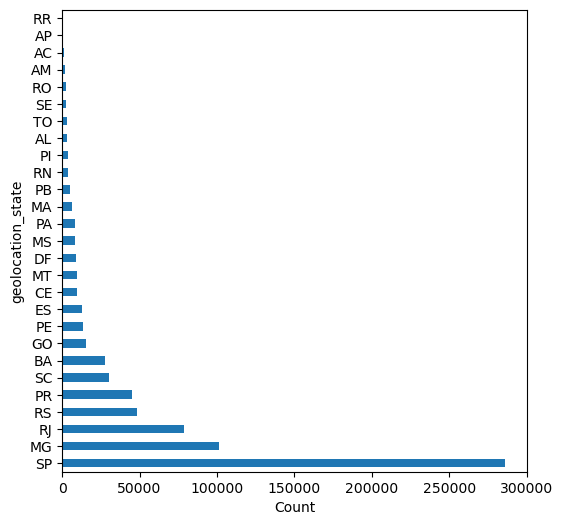

In [93]:
discrete_cols = ["geolocation_state"]

for i in discrete_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    olist_geolocation_dataset[i].value_counts().plot.barh()
    plt.xlabel("Count")
    plt.ylabel(i)
    plt.show()
    print()

In [94]:
olist_order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


### Continuous Univariate Analysis on olist_order_items_dataset

************************************************** price **************************************************


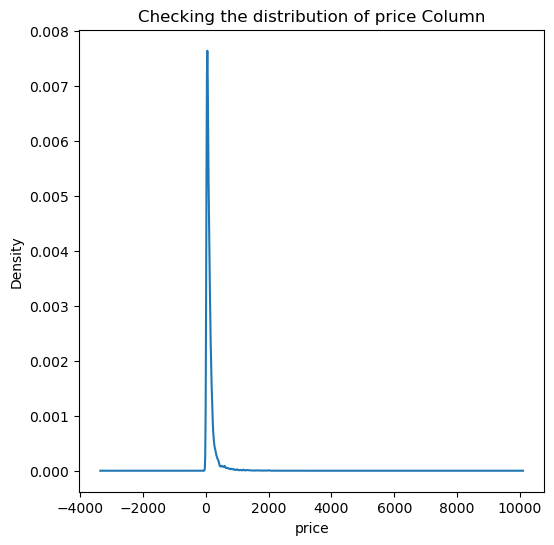


************************************************** freight_value **************************************************


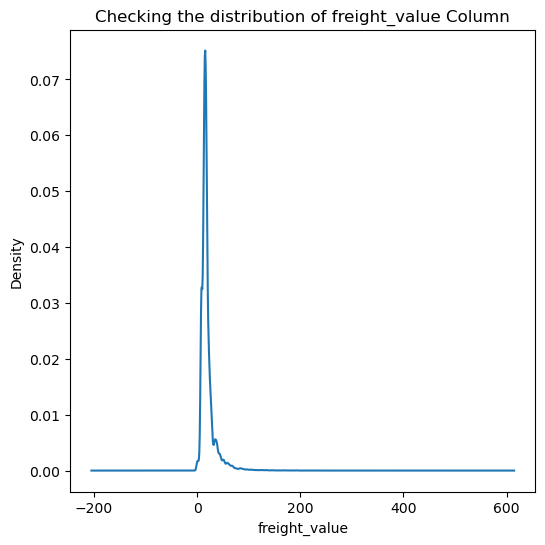

In [95]:
continuous_cols = ["price", "freight_value"]

for i in continuous_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    olist_order_items_dataset[i].plot.kde()
    plt.xlabel(i)
    plt.title(f"Checking the distribution of {i} Column")
    plt.show()
    print()

************************************************** price **************************************************


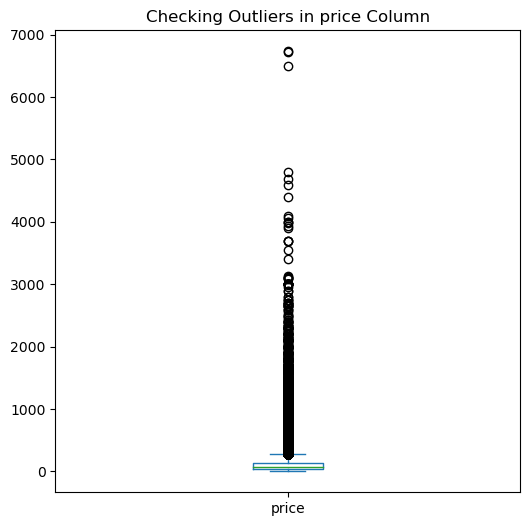


************************************************** freight_value **************************************************


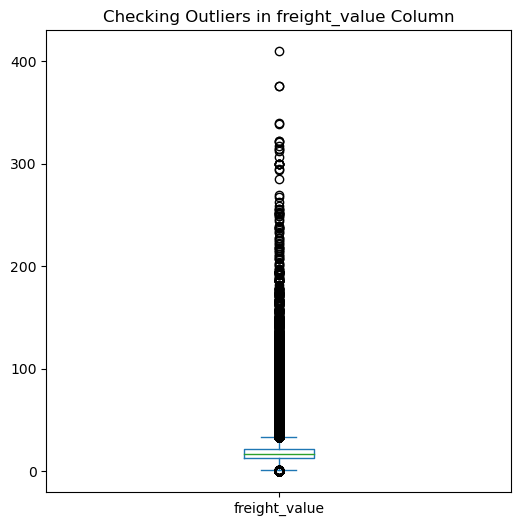

In [96]:
continuous_cols = ["price", "freight_value"]

for i in continuous_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    olist_order_items_dataset[i].plot.box()
    plt.title(f"Checking Outliers in {i} Column")
    plt.show()
    print()

In [97]:
olist_order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


### Discrete Univariate Analysis on olist_order_payments_dataset

************************************************** payment_type **************************************************


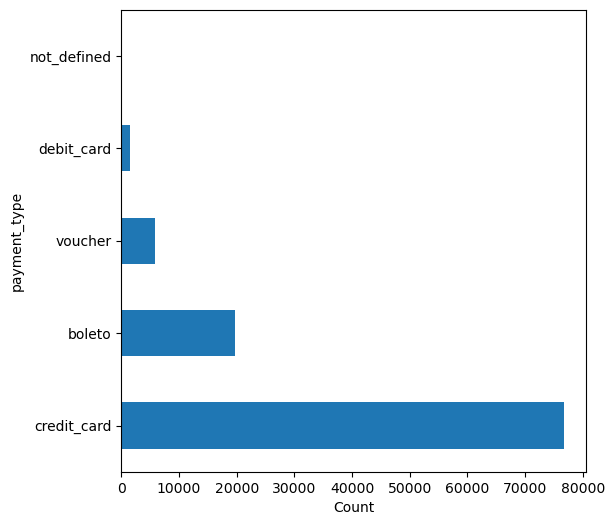


************************************************** payment_installments **************************************************


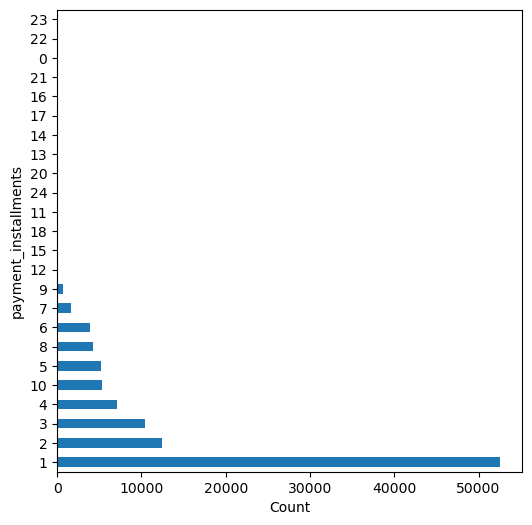


************************************************** payment_sequential **************************************************


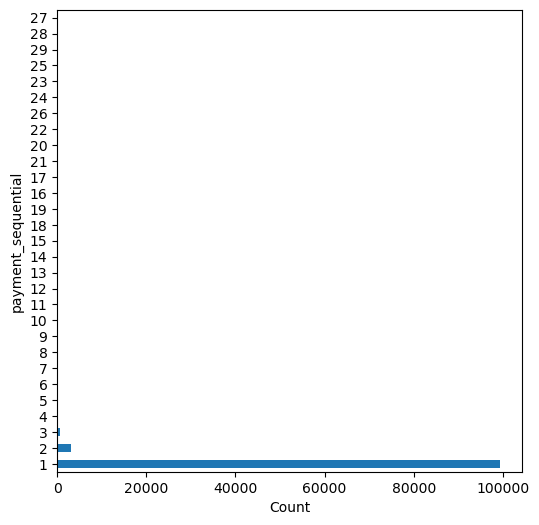

In [98]:
discrete_cols = ["payment_type", "payment_installments", "payment_sequential"]

for i in discrete_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    olist_order_payments_dataset[i].value_counts().plot.barh()
    plt.xlabel("Count")
    plt.ylabel(i)
    plt.show()
    print()

### Continuous Univariate Analysis on olist_order_payments_dataset

************************************************** payment_value **************************************************


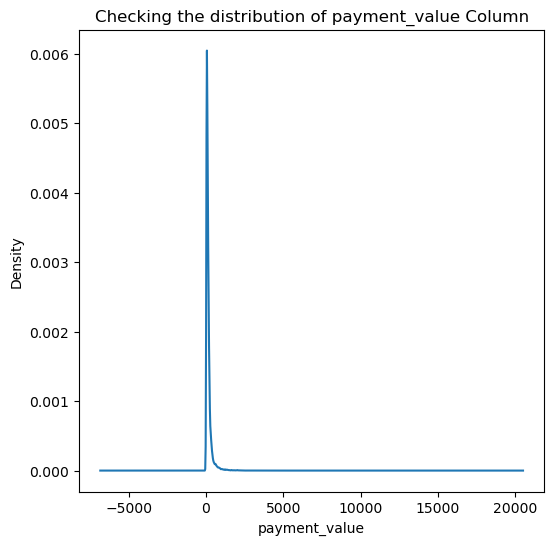

In [99]:
continuous_cols = ["payment_value"]

for i in continuous_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    olist_order_payments_dataset[i].plot.kde()
    plt.xlabel(i)
    plt.title(f"Checking the distribution of {i} Column")
    plt.show()
    print()

************************************************** payment_value **************************************************


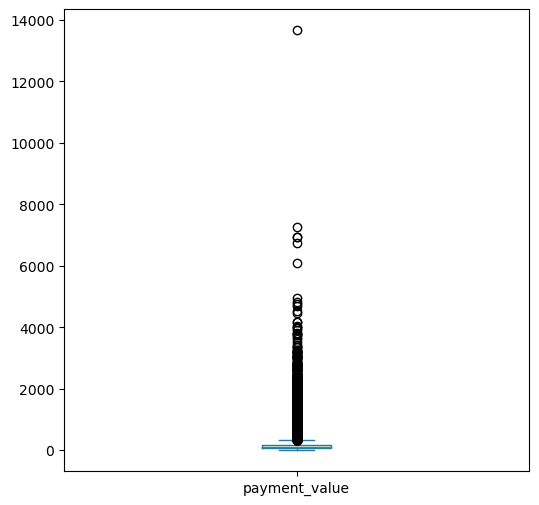

In [100]:
continuous_cols = ["payment_value"]

for i in continuous_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    olist_order_payments_dataset[i].plot.box()
    plt.show()
    print()

In [101]:
olist_order_reviews_dataset

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01,2018-07-02 12:59:13


### Discrete Univariate Analysis on olist_order_reviews_dataset

************************************************** review_score **************************************************


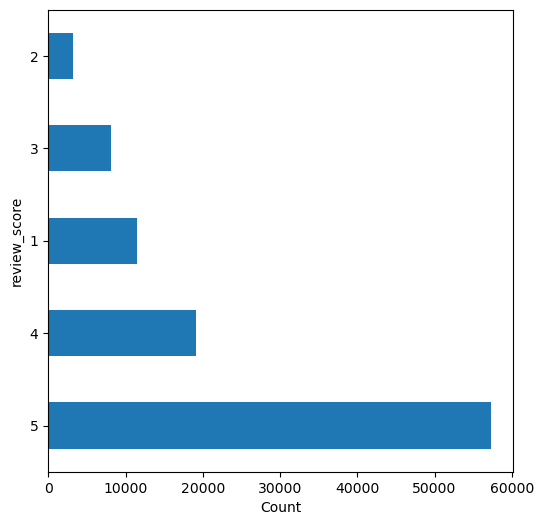

In [104]:
discrete_cols = ["review_score"]

for i in discrete_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    olist_order_reviews_dataset[i].value_counts().plot.barh()
    plt.xlabel("Count")
    plt.ylabel(i)
    plt.show()
    print()

************************************************** review_score **************************************************


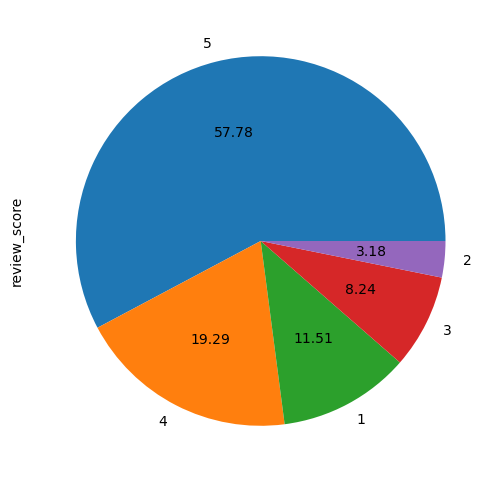

In [105]:
for i in discrete_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    olist_order_reviews_dataset[i].value_counts().plot.pie(autopct = "%.2f")
    plt.show()

### Discrete Univariate Analysis on olist_orders_dataset

In [106]:
olist_orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,total_items,total_price,total_freight_value,total_payment_value,payment_type,max_installments,avg_review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,1,29.99,8.72,38.71,voucher,1,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13,1,118.70,22.76,141.46,boleto,1,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04,1,159.90,19.22,179.12,credit_card,3,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-15,1,45.00,27.20,72.20,credit_card,1,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-26,1,19.90,8.72,28.62,credit_card,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-28,1,72.00,13.08,85.08,credit_card,3,5
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-03-02,1,174.90,20.10,195.00,credit_card,3,4
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-27,1,205.99,65.02,271.01,credit_card,5,5
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-02-15,2,359.98,81.18,441.16,credit_card,4,2


************************************************** order_status **************************************************


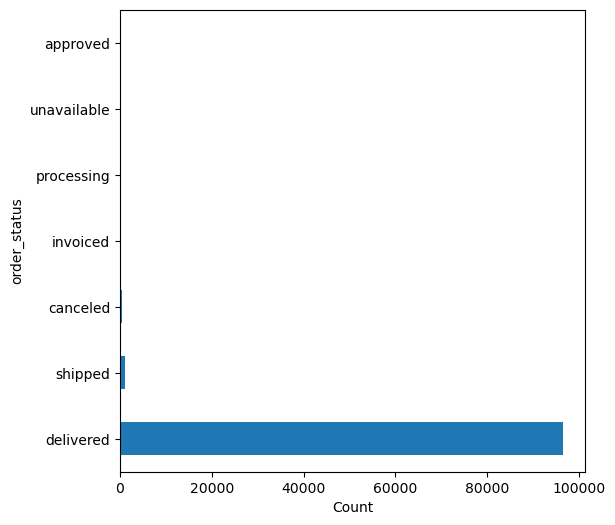


************************************************** total_items **************************************************


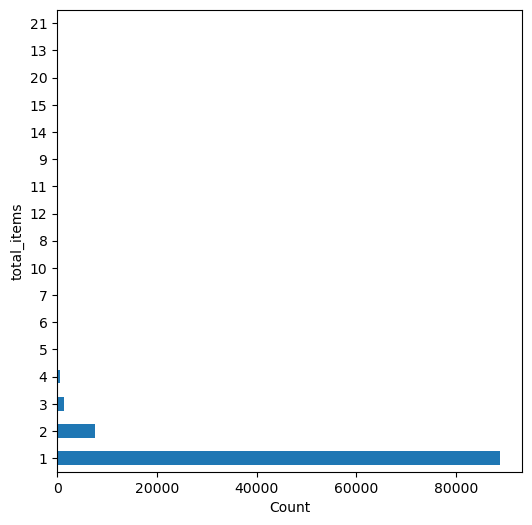


************************************************** payment_type **************************************************


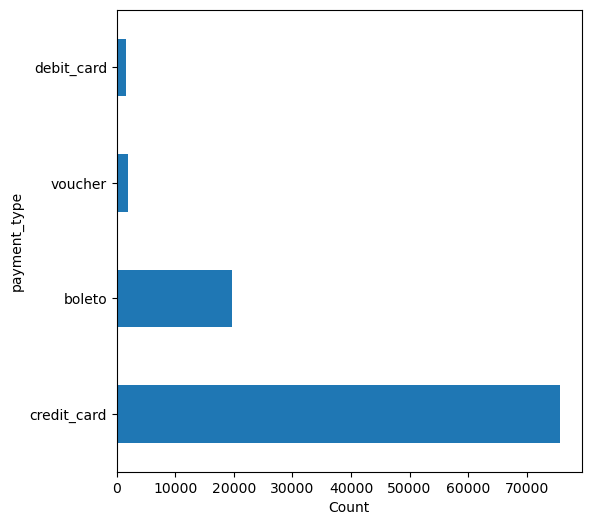


************************************************** max_installments **************************************************


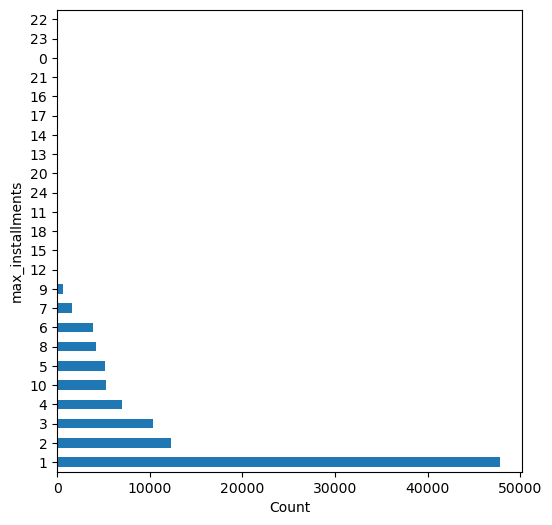


************************************************** avg_review_score **************************************************


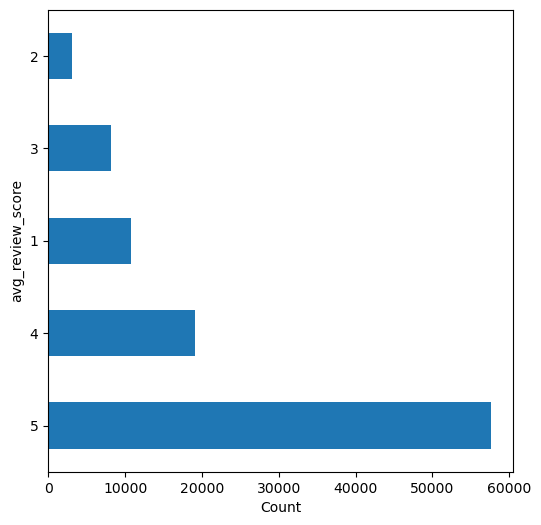

In [111]:
discrete_cols = ["order_status", "total_items", "payment_type", "max_installments", "avg_review_score"]

for i in discrete_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    olist_orders_dataset[i].value_counts().plot.barh()
    plt.xlabel("Count")
    plt.ylabel(i)
    plt.show()
    print()

### Continuous Univariate Analysis on olist_orders_dataset

In [113]:
olist_orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,total_items,total_price,total_freight_value,total_payment_value,payment_type,max_installments,avg_review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,1,29.99,8.72,38.71,voucher,1,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13,1,118.70,22.76,141.46,boleto,1,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04,1,159.90,19.22,179.12,credit_card,3,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-15,1,45.00,27.20,72.20,credit_card,1,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-26,1,19.90,8.72,28.62,credit_card,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-28,1,72.00,13.08,85.08,credit_card,3,5
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-03-02,1,174.90,20.10,195.00,credit_card,3,4
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-27,1,205.99,65.02,271.01,credit_card,5,5
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-02-15,2,359.98,81.18,441.16,credit_card,4,2


************************************************** total_price **************************************************


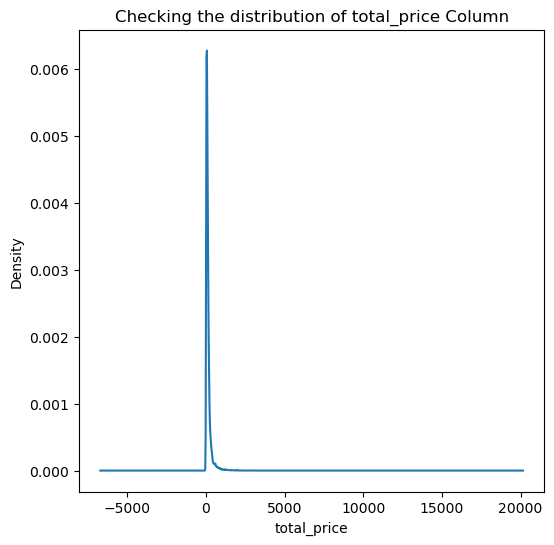


************************************************** total_freight_value **************************************************


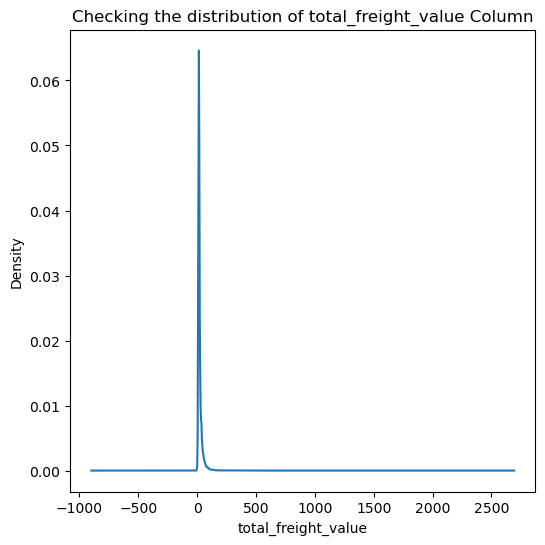


************************************************** total_payment_value **************************************************


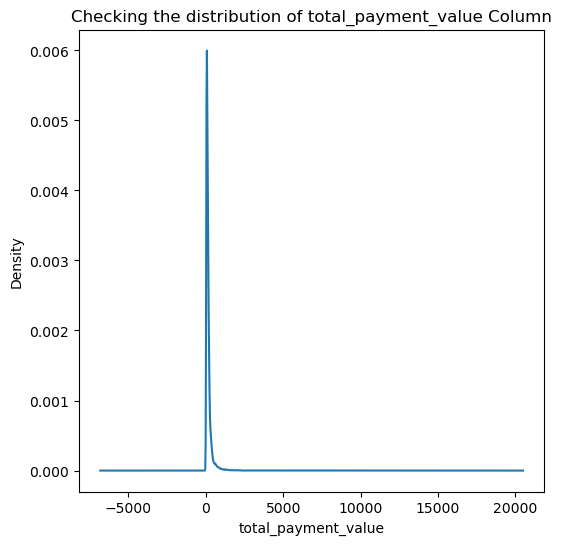

In [115]:
continuous_cols = ["total_price", "total_freight_value", "total_payment_value"]

for i in continuous_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    olist_orders_dataset[i].plot.kde()
    plt.xlabel(i)
    plt.title(f"Checking the distribution of {i} Column")
    plt.show()
    print()


************************************************** total_price **************************************************


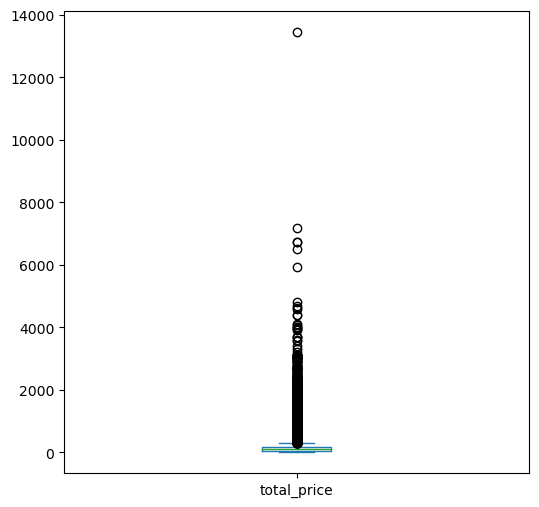


************************************************** total_freight_value **************************************************


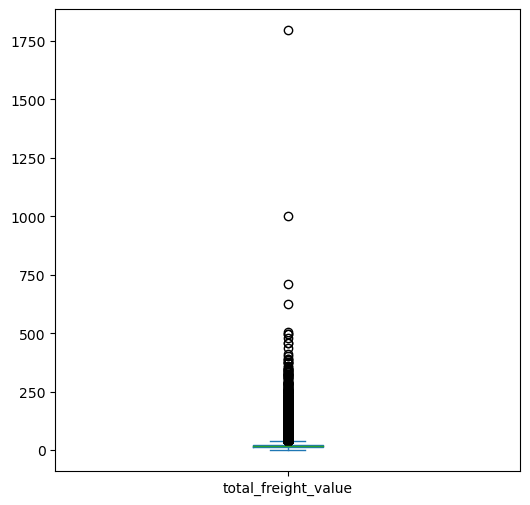


************************************************** total_payment_value **************************************************


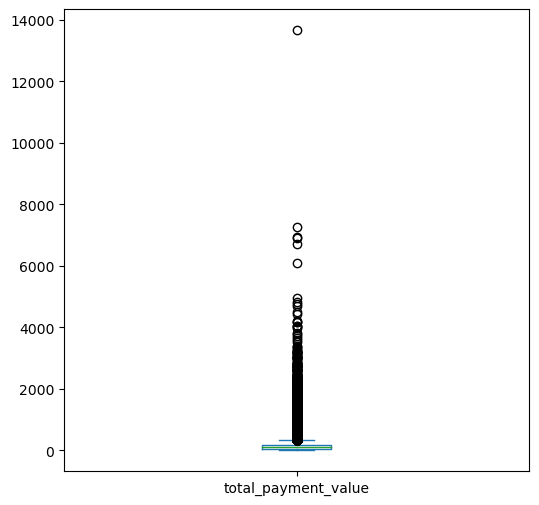

In [116]:
for i in continuous_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    olist_orders_dataset[i].plot.box()
    plt.show()
    print()

### Continuous Univariate Analysis on olist_products_dataset

In [117]:
olist_products_dataset

,product_id,product_category,product_name_length,product_description_length,product_photos_quantity,product_weight_gm,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,baby,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,housewares,37,402,4,625,20,17,13
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,45,67,2,12300,40,40,40
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,41,971,1,1700,16,19,16
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,50,799,1,1400,27,7,27
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories,60,156,2,700,31,13,20


************************************************** product_name_length **************************************************


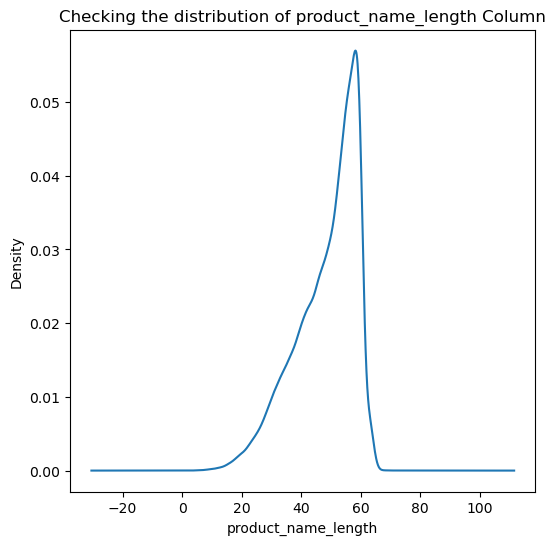


************************************************** product_description_length **************************************************


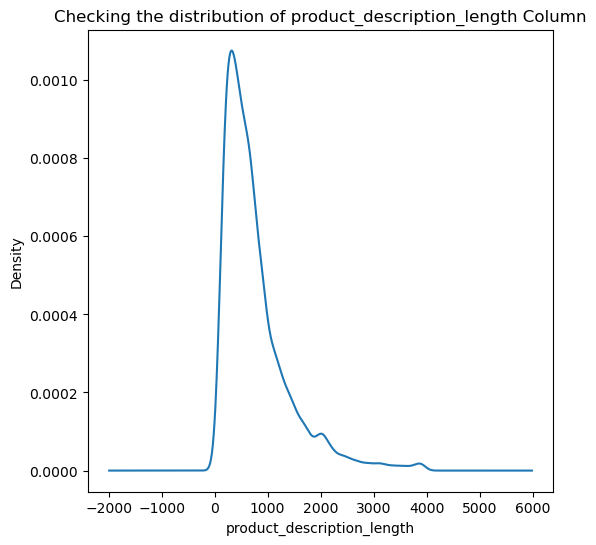


************************************************** product_weight_gm **************************************************


C:\Users\yuges\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\hist.py:203: RuntimeWarning: overflow encountered in scalar subtract
  sample_range = np.nanmax(y) - np.nanmin(y)


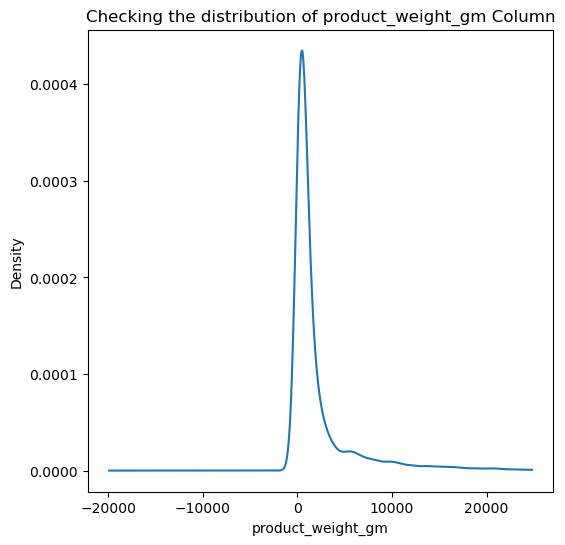


************************************************** product_length_cm **************************************************


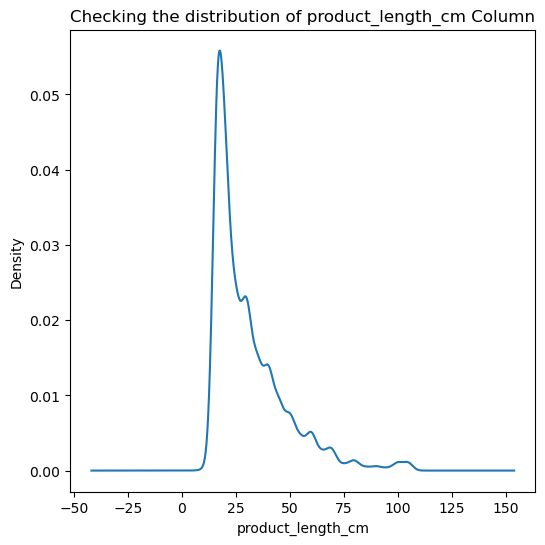


************************************************** product_height_cm **************************************************


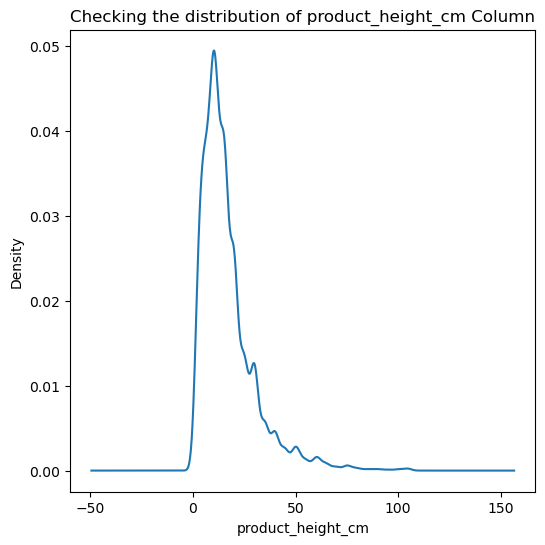


************************************************** product_width_cm **************************************************


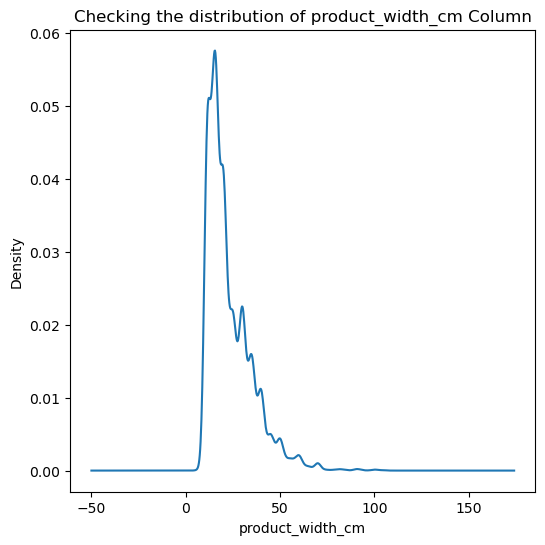

In [118]:
continuous_cols = ["product_name_length", "product_description_length", "product_weight_gm", "product_length_cm","product_height_cm","product_width_cm"]

for i in continuous_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    olist_products_dataset[i].plot.kde()
    plt.xlabel(i)
    plt.title(f"Checking the distribution of {i} Column")
    plt.show()
    print()

************************************************** product_name_length **************************************************


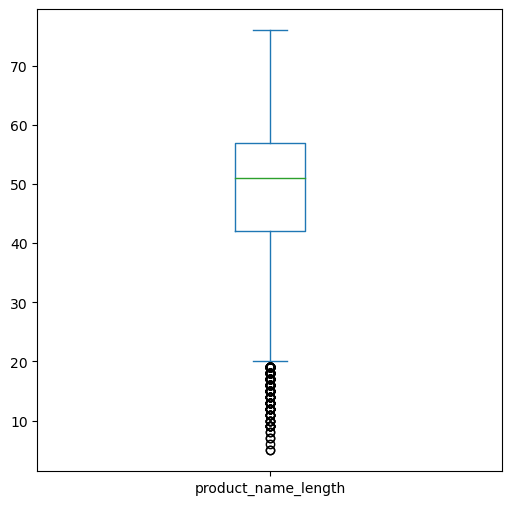


************************************************** product_description_length **************************************************


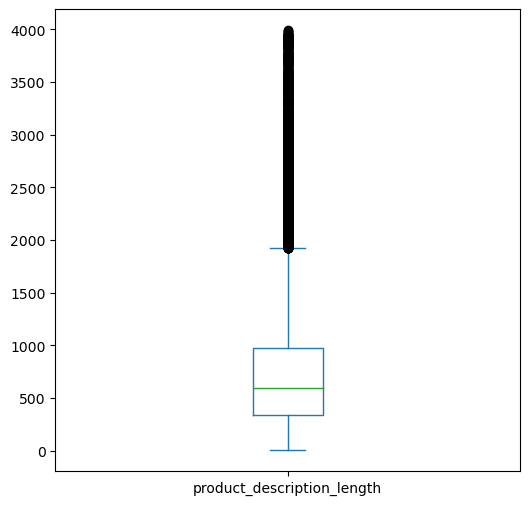


************************************************** product_weight_gm **************************************************


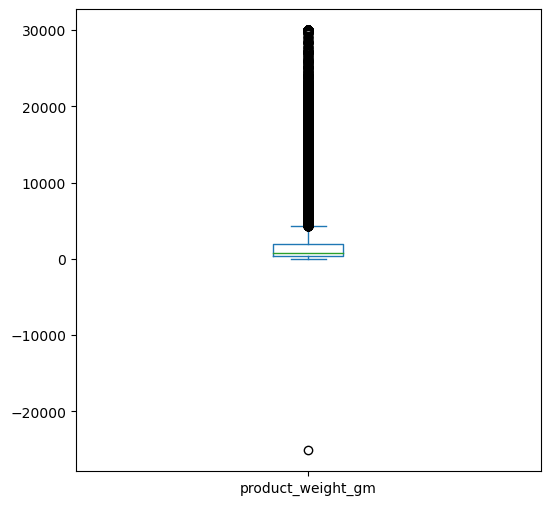


************************************************** product_length_cm **************************************************


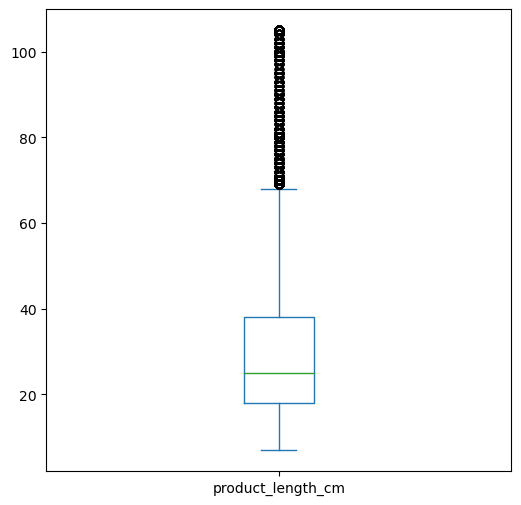


************************************************** product_height_cm **************************************************


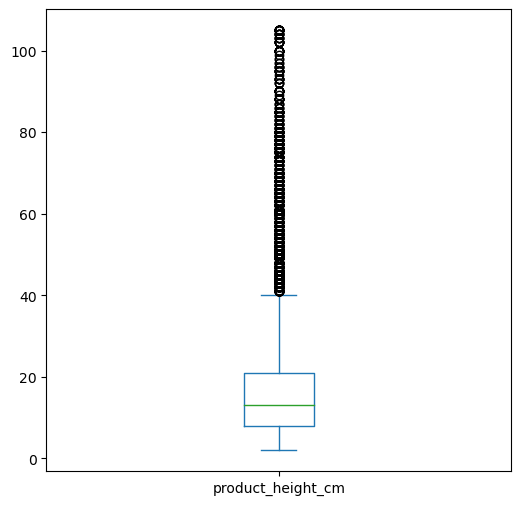


************************************************** product_width_cm **************************************************


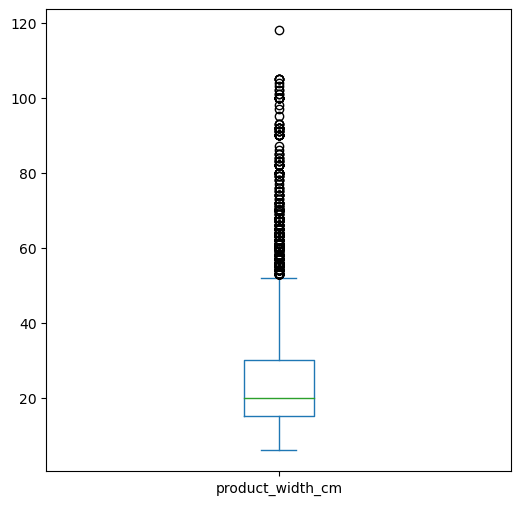

In [231]:
continuous_cols = ["product_name_length", "product_description_length", "product_weight_gm", "product_length_cm","product_height_cm","product_width_cm"]

for i in continuous_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    olist_products_dataset[i].plot.box()
    plt.show()
    print()

### Discrete Univariate Analysis on olist_products_dataset

************************************************** product_photos_quantity **************************************************


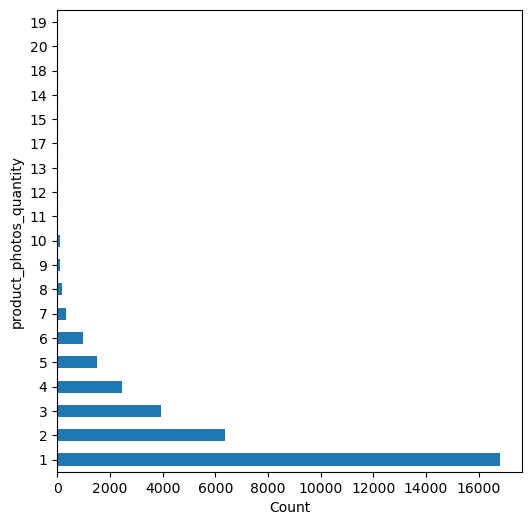

In [223]:
discrete_cols = ["product_photos_quantity"]

for i in discrete_cols:
    print("*"*50 + " "+ f"{i}" +" "+"*"*50)
    plt.figure(figsize = (6,6))
    olist_products_dataset[i].value_counts().plot.barh()
    plt.xlabel("Count")
    plt.ylabel(i)
    plt.show()
    print()

### Discrete Univariate Analysis on olist_sellers_dataset

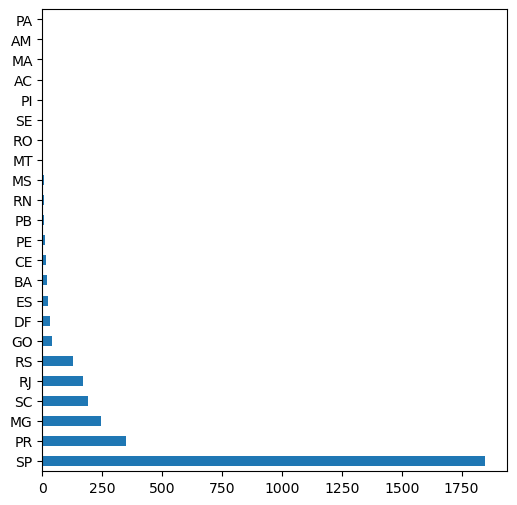

In [227]:
plt.figure(figsize = (6,6))
olist_sellers_dataset["seller_state"].value_counts().plot.barh()
plt.show()

In [122]:
data

,event_id,timestamp,customer_id,session_id,order_id,product_id,seller_id,product_category,product_price,quantity,payment_type,customer_state,customer_city
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,1988-09-18 21:22:51,843b7d4774939fba2fbc6fa2a014bd81,bc8960a9-23b8-41e9-b924-56de3eb13b90,8e06d9e5843b8db91a450598c1c8e2b7,e35b86603770bdb3faef7f1dac64aca0,d73cbd89533ce8b041a9190241453ac8,blue,466.34,3,voucher,TX,New Roberttown
1,815ef6d1-3b8f-4a18-b7f8-a88b17fc695a,2010-12-20 06:09:38,caba2eba9fa3f3a3a838cc2a8307edc3,b74d0fb1-32e7-4629-8fad-c1a606cb0fb3,e024b7de0d4c8896d442d786f81f7db7,ce497a3d92ec305f5d9ef0c4b6980a95,2e2f44824ab87a0cb961f68bf4073e7f,rate,782.73,5,boleto,UT,Robinsonshire
2,01a9e71f-de8a-474b-8f36-d58b47378190,2021-08-21 06:13:25,142fe8eada241df2f071e978e6dbc04c,6c307511-b2b9-437a-a8df-6ec4ce4a2bbd,ee789d8c9f580179177f5445b0e92a1f,af64874ef27a7dc357905b75ea78555a,6d803cb79cc31c41c4c789a75933b3c7,grow,48.93,3,credit_card,KY,East Susan
3,6142ea7d-17be-4111-9a2a-73ed562b0f79,1976-07-31 21:34:03,4c14a6a902df9ab457b0cef46b8b7572,9a8dca03-580d-4b71-98f5-64135be6128e,6e1d6161b9c3022a013add19495f1018,c8b96022819f31119f1404ad2c3c1059,9d213f303afae4983637247556438ede,everything,348.35,4,credit_card,AS,Lake Stephenville
4,142c3fe8-60e7-4113-ac1b-8ca1f91e1d4c,2007-07-27 01:03:52,bd9c26ea95121ee056c338cedb587129,9e574f7a-a0ee-49ae-9453-dd324b0dbb41,4a1cdb6acae789b7687bf12c6441949b,58c41dff5d439e3f6260765550748762,35ef5aa32949680f627efec3c23e705c,value,116.07,2,credit_card,VI,Barbaraland
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,7f7da69f-878f-46ad-8f78-261257a1f780,2006-06-04 17:06:21,4f6f0eca50e39790e9e7be70902d233f,ef2324df-a889-4b24-8fb3-7a3233ae188b,5409cdf5d7f44a620466f80570fade10,b71c0cacf053d9d8f92eb5965d8bd00c,821fb029fc6e495ca4f08a35d51e53a5,will,566.48,3,credit_card,DE,South Elizabeth
29996,d0f5a3a0-9027-4a0d-a4fd-d76182682144,1970-07-28 18:59:13,16d73e261aea495e0711671d3d20c1d9,b6f54f4b-d354-465d-9de0-c0095252255a,0020a222f55eb79a372d0efee3cca688,8d0e7a8e1b1fb5343135045cb7c21542,fe1b067411b8c5066e962aa146ccee03,million,396.84,2,debit_card,HI,North Laceymouth
29997,8c6cba9c-ae5c-47e1-928b-4f59cda93bad,2001-03-16 11:40:00,06341c02de61d57cbc4f4ed2e5c3f8e1,5aaf49df-ff66-4ee1-aa96-3cb3ea42f0a8,3010db5aa9feaeb7bf56382abccca96f,99b5175198369d12de8feee13dafac16,4559697a8f7e637227c2eeaed843baff,particularly,490.09,4,credit_card,MP,West Amanda
29998,d7f093df-a4af-4261-b1c1-14584388fe26,1987-06-23 22:04:53,4a21474dedd06a28954ad947be2a1674,0c65c6ad-f46b-47ec-8724-3b807a98eb17,b76190a2c095fba255ab46987545a660,90ed53d34bfcb4fa1e90656068dd04bc,4559697a8f7e637227c2eeaed843baff,reduce,905.70,2,boleto,FM,Lake Kristyside


In [123]:
olist_customers_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [124]:
olist_geolocation_dataset

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [125]:
olist_order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [126]:
olist_order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [127]:
olist_order_reviews_dataset

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01,2018-07-02 12:59:13


In [128]:
olist_orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,total_items,total_price,total_freight_value,total_payment_value,payment_type,max_installments,avg_review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,1,29.99,8.72,38.71,voucher,1,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13,1,118.70,22.76,141.46,boleto,1,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04,1,159.90,19.22,179.12,credit_card,3,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-15,1,45.00,27.20,72.20,credit_card,1,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-26,1,19.90,8.72,28.62,credit_card,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-28,1,72.00,13.08,85.08,credit_card,3,5
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-03-02,1,174.90,20.10,195.00,credit_card,3,4
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-27,1,205.99,65.02,271.01,credit_card,5,5
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-02-15,2,359.98,81.18,441.16,credit_card,4,2


In [129]:
olist_products_dataset

,product_id,product_category,product_name_length,product_description_length,product_photos_quantity,product_weight_gm,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,baby,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,housewares,37,402,4,625,20,17,13
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,45,67,2,12300,40,40,40
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,41,971,1,1700,16,19,16
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,50,799,1,1400,27,7,27
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories,60,156,2,700,31,13,20


In [130]:
olist_sellers_dataset

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [131]:
olist_orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,total_items,total_price,total_freight_value,total_payment_value,payment_type,max_installments,avg_review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,1,29.99,8.72,38.71,voucher,1,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13,1,118.70,22.76,141.46,boleto,1,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04,1,159.90,19.22,179.12,credit_card,3,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-15,1,45.00,27.20,72.20,credit_card,1,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-26,1,19.90,8.72,28.62,credit_card,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-28,1,72.00,13.08,85.08,credit_card,3,5
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-03-02,1,174.90,20.10,195.00,credit_card,3,4
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-27,1,205.99,65.02,271.01,credit_card,5,5
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-02-15,2,359.98,81.18,441.16,credit_card,4,2


In [88]:
olist_customers_dataset.to_csv(r"C:\Users\yuges\Downloads\E - commerce pipeline cleaned data\olist_customers_cleaned_dataset.csv", index = None)

In [89]:
olist_geolocation_dataset.to_csv(r"C:\Users\yuges\Downloads\E - commerce pipeline cleaned data\olist_geolocation_cleaned_dataset.csv", index = None)

In [90]:
olist_order_items_dataset.to_csv(r"C:\Users\yuges\Downloads\E - commerce pipeline cleaned data\olist_order_items_cleaned_dataset.csv", index = None)

In [91]:
olist_order_payments_dataset.to_csv(r"C:\Users\yuges\Downloads\E - commerce pipeline cleaned data\olist_order_payments_cleaned_dataset.csv", index = None)

In [92]:
olist_order_reviews_dataset.to_csv(r"C:\Users\yuges\Downloads\E - commerce pipeline cleaned data\olist_order_reviews_cleaned_dataset.csv", index = None)

In [93]:
olist_orders_dataset.to_csv(r"C:\Users\yuges\Downloads\E - commerce pipeline cleaned data\olist_orders_cleaned_dataset.csv", index = None)

In [94]:
olist_products_dataset.to_csv(r"C:\Users\yuges\Downloads\E - commerce pipeline cleaned data\olist_products_cleaned_dataset.csv", index = None)

In [95]:
olist_sellers_dataset.to_csv(r"C:\Users\yuges\Downloads\E - commerce pipeline cleaned data\olist_sellers_cleaned_dataset.csv", index = None)

In [99]:
import os, pandas as pd

cleaned_files = os.listdir(r"C:\Users\yuges\Downloads\E - commerce pipeline cleaned data")

In [100]:
l = []
for i in cleaned_files:
    l.append(pd.read_csv(r"C:\Users\yuges\Downloads\E - commerce pipeline cleaned data\{}".format(i)))

In [101]:
cleaned_files

['olist_customers_cleaned_dataset.csv',
 'olist_geolocation_cleaned_dataset.csv',
 'olist_orders_cleaned_dataset.csv',
 'olist_order_items_cleaned_dataset.csv',
 'olist_order_payments_cleaned_dataset.csv',
 'olist_order_reviews_cleaned_dataset.csv',
 'olist_products_cleaned_dataset.csv',
 'olist_sellers_cleaned_dataset.csv']

In [102]:
olist_customers_cleaned_dataset = l[0]

olist_geolocation_cleaned_dataset = l[1]

olist_orders_cleaned_dataset = l[2]

olist_order_items_cleaned_dataset = l[3]

olist_order_payments_cleaned_dataset = l[4]

olist_order_reviews_cleaned_dataset = l[5]

olist_products_cleaned_dataset = l[6]

olist_sellers_cleaned_dataset = l[7]

In [103]:
from sqlalchemy import create_engine


MYSQL_USER = "root"
MYSQL_PASSWORD = "2193"
MYSQL_HOST = "localhost" 
MYSQL_PORT = 3306
MYSQL_DB = "Ecommerce_Project"
engine = create_engine(f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DB}")

olist_products_cleaned_dataset.to_sql(name="dim_products", con=engine, if_exists="replace", index=False)


32327

In [104]:
olist_customers_cleaned_dataset.to_sql(name = "dim_customers", con = engine, if_exists = "replace", index = False)

99441

In [105]:
olist_orders_cleaned_dataset.to_sql(name = "dim_orders", con = engine, if_exists = "replace", index = False)

98665

In [106]:
olist_sellers_cleaned_dataset.to_sql(name = "dim_sellers", con = engine, if_exists = "replace", index = False)

3095

In [107]:
data.to_csv(r"C:\Users\yuges\Downloads\E - commerce pipeline cleaned data\Event_Data.csv", index = None)